For this portion of the project, we set out to determine the amount of both black men and white men who died in Allegheny County from police encounters between the years of 2013 and 2015. In order to find this number from the "Mapping Police Violence" Dataset, we used Pandas data frames as shown below.

In [49]:
import pandas as pd

After importing the Pandas library into Python, we went to "MappingPoliceViolence.org" and downloaded their dataset, which includes a list of all individuals in the US who died during fatal encounters with the police. After downloading this as an Excel file onto a desktop, we saved the file as a CSV file, which allowed us to upload this into Jupyter Hub. We then opened the file as a Pandas data frame, as you can see below. Please note that we are using "head" to make data frames shorter and add to the notebook's readability.

In [50]:
police_data = pd.read_csv("files/MPV.csv")
police_data.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,Willie Roy Allen,57,Male,NaN,NaN,3/31/2021,2626 Lithonia Industrial Blvd.,Lithonia,GA,30058.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jeffrey Ely,40,Male,White,https://fatalencounters.org/wp-content/uploads...,3/31/2021,247 Sullivan St.,Claremont,NH,3743.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ivan Cuevas,27,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,3/31/2021,North Conyer Street,Visalia,CA,93291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anthony Alvarez,22,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,3/31/2021,W. Eddy St. and N. Laramie Ave.,Chicago,IL,60641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aaron Christopher Pouche,35,Male,NaN,NaN,3/31/2021,E. 8th St. and S. Carlisle,Independence,MO,64054.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This next section was a bit tricky, and with assistance from Dr. Biehl, we used "astype - datetime64", which transfered the data within the column to a data/time field so we could find the incidents within the years we were looking for, 2013 to 2015. (A helpful way to think about it is "Pandas dtype *datetime64*" = "Python data type = *datetime*"), just as Pandas's dtype "int64" is equal to an "integer" in regular old Python. Same kind of data, just named differently in the library.) After that, we created a query mask to find the incidents between 2013 and 2015, and a second query mask to find the incidents that took place in Allegheny County. Assigning the variable "allegheny_violence" to the combination of both query masks, we found our incidents. Rather than indexing them by numbers from the original dataset, we indexed the resulting data by the victim's name.

In [51]:
police_data["Date of Incident (month/day/year)"] = police_data["Date of Incident (month/day/year)"].astype("datetime64[ns]")
year_county_mask = (police_data["Date of Incident (month/day/year)"] > "1-1-2013") & (police_data["Date of Incident (month/day/year)"] <= "12-31-2015")
county_query_mask = police_data["County"] == "Allegheny"
allegheny_violence = police_data[county_query_mask & year_county_mask]
allegheny_violence.set_index("Victim's name")

,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
Victim's name,,,,,,,,,,,,,,,,,,,,,
Raymone Davis,21,Male,Black,NaN,2015-12-04,122 Shiloh Street,Pittsburgh,PA,15211.0,Allegheny,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tyrone Harris,20,Male,Black,http://www.post-gazette.com/image/2015/06/23/4...,2015-06-22,700 Saw Mill Run Blvd,Pittsburgh,PA,15226.0,Allegheny,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leslie Sapp III,47,Male,Black,https://cbspittsburgh.files.wordpress.com/2015...,2015-01-06,101 Redlyn Street,Knoxville,PA,15210.0,Allegheny,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adrian Williams,29,Male,Black,https://ionenewpittsburghcourier.files.wordpre...,2014-04-21,Penn Avenue and South Trenton Avenue,Wilkinsburg,PA,15221.0,Allegheny,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charles Hull,56,Male,Black,http://www.fatalencounters.org/wp-content/uplo...,2014-01-27,10000 Calvin St,Penn Hills,PA,15235.0,Allegheny,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paul Slimick,26,Male,White,https://www.youtube.com/watch?v=sa5xpCIqZOo,2013-12-09,200 E Patty Ln,Monroeville,PA,15146.0,Allegheny,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jared Brown-Garnham,21,Male,Black,http://media.masslive.com/breakingnews/photo/2...,2013-12-08,Lindbergh Drive,Moon,PA,15108.0,Allegheny,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shawn Evans,56,Male,White,NaN,2013-09-08,4501 Torley St,Pittsburg,PA,NaN,Allegheny,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Robert Brooks,27,Male,White,http://www.post-gazette.com/image/2013/10/17/4...,2013-07-08,302 Thorn Street,Sewickley,PA,15143.0,Allegheny,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


While not exactly the number we're looking for, let's check in and see how many individuals were killed in Allegheny County during this time frame during police encounters. (The bottom of the dataset gives us a hint, but let's double check.)

In [52]:
len(allegheny_violence)

9

There's our confirmation - 9 individuals killed. Before performing this data manipulation, we weren't sure if we were going to have to factor out the victims by gender or other races, as we are only looking at black and white men for this project. As you can see, we don't need to do that, as every individual in this new dataset was a black or white male. Now, in our request to fully answer Question 1, we need to further break down the data sets by race (black/white), as well as find the median age at time of death for these two groups of individuals. We're using another query mask to narrow down the dataset to only include victims whose race is "Black."

In [53]:
b_mask = allegheny_violence["Victim's race"] == "Black"
b_victims = allegheny_violence[b_mask]
b_victims

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
5885,Raymone Davis,21,Male,Black,NaN,2015-12-04,122 Shiloh Street,Pittsburgh,PA,15211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6400,Tyrone Harris,20,Male,Black,http://www.post-gazette.com/image/2015/06/23/4...,2015-06-22,700 Saw Mill Run Blvd,Pittsburgh,PA,15226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6889,Leslie Sapp III,47,Male,Black,https://cbspittsburgh.files.wordpress.com/2015...,2015-01-06,101 Redlyn Street,Knoxville,PA,15210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7643,Adrian Williams,29,Male,Black,https://ionenewpittsburghcourier.files.wordpre...,2014-04-21,Penn Avenue and South Trenton Avenue,Wilkinsburg,PA,15221.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7882,Charles Hull,56,Male,Black,http://www.fatalencounters.org/wp-content/uplo...,2014-01-27,10000 Calvin St,Penn Hills,PA,15235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7999,Jared Brown-Garnham,21,Male,Black,http://media.masslive.com/breakingnews/photo/2...,2013-12-08,Lindbergh Drive,Moon,PA,15108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After that, we use the Data Frame function "median" to determine the median age.

In [54]:
b_victims["Victim's age"].median()

25.0

We're now going to repeat the process with white victims to find their median age.

In [55]:
w_mask = allegheny_violence["Victim's race"] == "White"
w_victims = allegheny_violence[w_mask]
w_victims

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
7996,Paul Slimick,26,Male,White,https://www.youtube.com/watch?v=sa5xpCIqZOo,2013-12-09,200 E Patty Ln,Monroeville,PA,15146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8248,Shawn Evans,56,Male,White,NaN,2013-09-08,4501 Torley St,Pittsburg,PA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8443,Robert Brooks,27,Male,White,http://www.post-gazette.com/image/2013/10/17/4...,2013-07-08,302 Thorn Street,Sewickley,PA,15143.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
w_victims["Victim's age"].median()

27.0

We found the answers we were looking for - the median age for black men killed in police encounters in Allegheny county between 2013 and 2015 is 25, and the median age for their white counterparts in the same scenario is 27.

To see this visualized, on a map ...

In [76]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
b_victims_clean = b_victims[["Victim's age", "Date of Incident (month/day/year)"]].dropna()
b_victims_clean

,Victim's age,Date of Incident (month/day/year)
5885,21,2015-12-04
6400,20,2015-06-22
6889,47,2015-01-06
7643,29,2014-04-21
7882,56,2014-01-27
7999,21,2013-12-08


In [58]:
w_victims_clean = w_victims[["Victim's age", "Date of Incident (month/day/year)"]].dropna()
w_victims_clean

,Victim's age,Date of Incident (month/day/year)
7996,26,2013-12-09
8248,56,2013-09-08
8443,27,2013-07-08


TypeError: unhashable type: 'numpy.ndarray'

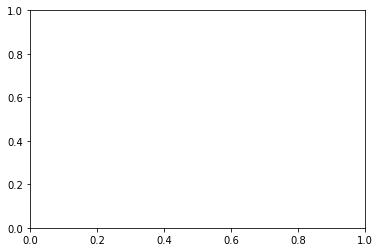

In [80]:
fig, ax = plt.subplots()

x = np.linspace(1, 5, 5)
y = b_victims_clean["Date of Incident (month/day/year)"]
b_police_victims = [b_victims_clean["Victim's age"]]
line1 = ax.plot(x, b_police_victims, label='Black Men')

x2 = np.linspace(1, 5, 5)
y2 = w_victims_clean["Date of Incident (month/day/year"]
w_police_victims = [w_victims_clean["Victim's age"]]
line2 = ax.plot(x2, w_police_victims, label='White Men')

ax.legend()
plt.show()